# Fundamentals of Machine Learning - Exercise 5
Dominique Cheray & Manuel Krämer
## 1 Constructing the matrix X

In [4]:
import numpy as np
from scipy.sparse import linalg
from scipy.sparse import coo_matrix
from scipy.sparse import csc_matrix
import matplotlib.pyplot as plt

In [5]:
def construct_X(M, alphas, Np=None):
    if not Np:
        Np = np.ceil(np.sqrt(2) * M).astype(int)
    if Np % 2 == 0:
        Np += 1
    D = M * M
    No = len(alphas)
    N = Np * No
    C1 = (np.mgrid[0:M, 0:M][0]).flatten()
    C2 = (np.mgrid[0:M, 0:M][1]).flatten()
    C = np.vstack((C1, C2))
    # centralise the coordinates in C
    C = C - (M - 1) / 2
    # convert alphas to radian
    alphas_rad = np.radians(alphas)
    # now make vectors out of the angles
    n = np.zeros((2, No))
    n[0] = -np.sin(alphas_rad)
    n[1] = np.cos(alphas_rad)
    p = n.T.dot(C) + (Np - 1) / 2
    lower_element = np.floor(p).astype(int)
    upper_element = np.ceil(p).astype(int)
    lower_value = upper_element - p
    upper_value = p - lower_element
    weights = []
    i_indices = []
    j_indices = []
    for i in range(No):
        for j in range(len(lower_element[i])):
            if (lower_element[i][j] == upper_element[i][j]):
                weights.append(1)
                i_indices.append(i*Np+lower_element[i][j])
                j_indices.append(j)
            else:
                weights.append(lower_value[i][j])
                i_indices.append((i*Np+lower_element[i][j]))
                j_indices.append(j)
                weights.append(upper_value[i][j])
                i_indices.append(((i*Np+upper_element[i][j])))
                j_indices.append(j)
    X = coo_matrix((weights, (i_indices, j_indices)), shape=(N, D), dtype=np.float32)
    print('Matrix is ready')
    return X

Matrix is ready


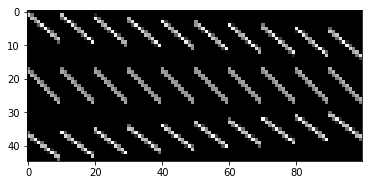

In [6]:
X_testing = construct_X(10, [-33, 1, 42])

X_dense = X_testing.todense()
plt.imshow(X_dense, interpolation="nearest", cmap=plt.cm.Greys_r)
plt.show()

##  2 Recovering the image

Matrix is ready
Number of non-zero elemenst: 13535957
Sparsity: 0.992768406286928


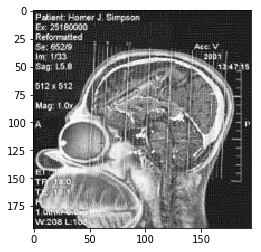

In [7]:
alphas195 = np.load('hs_tomography/alphas_195.npy')
X = construct_X(195, alphas195, 275)
print('Number of non-zero elemenst: ' + str(X.nnz))
total_elements = X.shape[0] * X.shape[1]
zeros = total_elements - X.nnz
sparsity = zeros/total_elements
print('Sparsity: ' + str(sparsity))
X_csc = X.tocsc()
y = np.load('hs_tomography/y_195.npy')
img = linalg.lsqr(X_csc, y, atol=1e-05, btol=1e-05)
img = img[0]
img = img.reshape((195, 195))
plt.imshow(img, cmap=plt.cm.Greys_r)
plt.show()

# Diagnosis: Stift im Gehirn
# Treatment: Melt the Wachsmalstift und saug ihn ab und Kerze daraus machen


Diagnosis: He has a crayon in his brain.
Proposed Treatment: Melt the crayon and then withdraw the melted wax by suction. Make a candle out of the wax as a souvenir.